# Requirements

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

## Introduction
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## The Water Potability Dataset

## Downloading the Water Potability Dataset

In [2]:
!gdown 1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW
To: /content/water-potability.csv
100% 525k/525k [00:00<00:00, 38.6MB/s]


## Exploring the Water Potability Dataset
The Water Potability dataset contains water quality metrics for 3276 different water bodies. The dataset includes ten attributes, each providing valuable information about water characteristics. These attributes encompass pH value, hardness, total dissolved solids (TDS), chloramines, sulfate concentration, conductivity, organic carbon, trihalomethanes, turbidity, and the target variable, potability. pH value is crucial for assessing the acid–base balance, while hardness indicates the presence of calcium and magnesium salts. TDS measures the mineral content, chloramines are disinfectants, sulfate is a natural substance found in minerals, conductivity indicates water's ability to conduct electric current, organic carbon measures carbon in organic compounds, and trihalomethanes are chemicals found in chlorine-treated water. Turbidity assesses the quantity of solid matter in suspended state. The target variable, 'Potability,' is binary (1 for potable and 0 for not potable), indicating whether water is safe for human consumption.

Load the dataset into a `pandas` data frame.

In [3]:
df=pd.read_csv('water-potability.csv')

In [4]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Exploring the dataset using visualizations

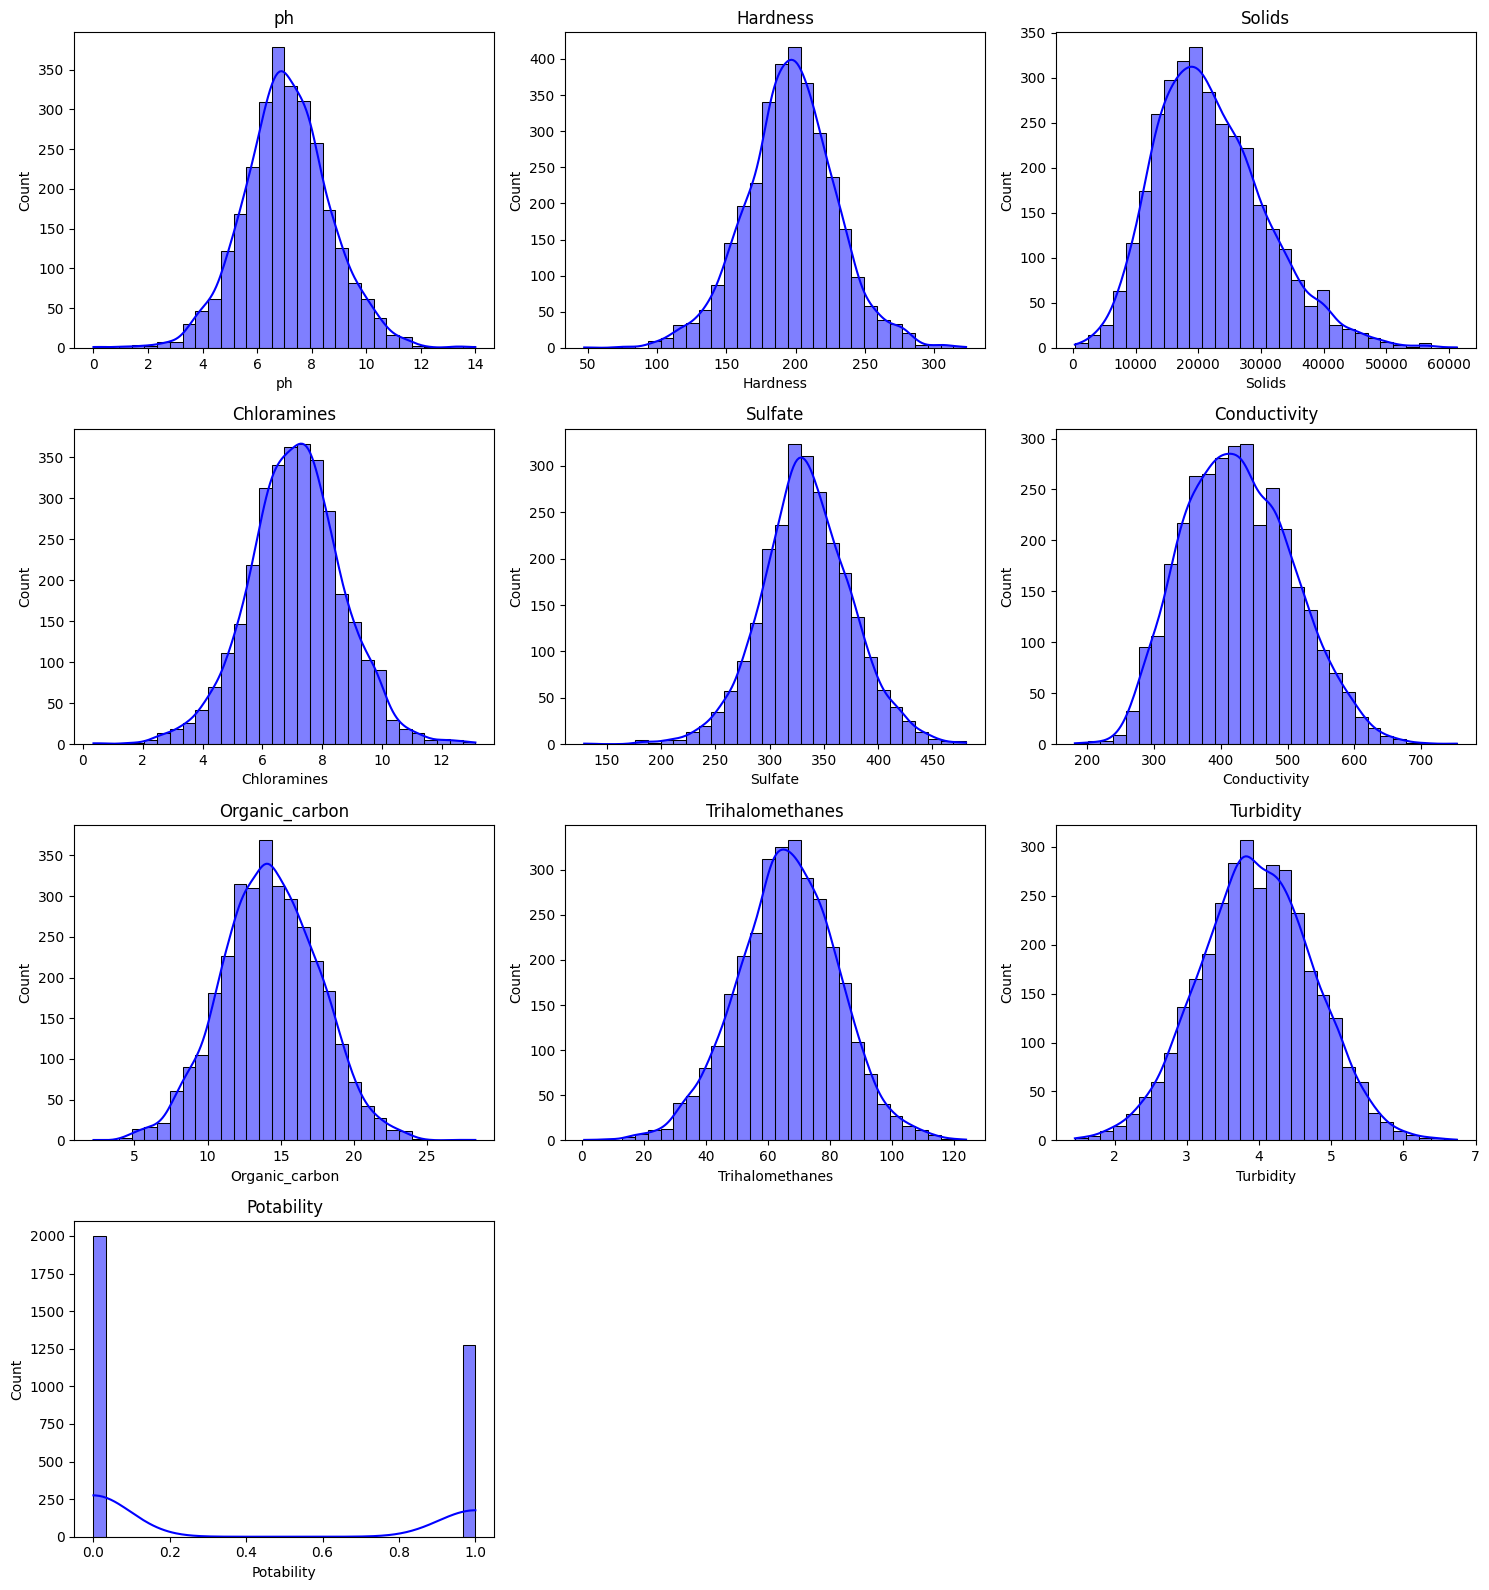

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = df.select_dtypes(include="number").columns

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[column], bins=30, kde=True, color="blue", edgecolor="black")
    plt.title(column)

plt.tight_layout()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

Check if the dataset is balanced.

In [9]:
df['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


## Detecting Missing Values


In [10]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [11]:
missing_values_percentage = 100 * missing_values_count / len(df)
missing_values_percentage

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


In [12]:
missing = pd.concat([missing_values_count, missing_values_percentage], axis=1)
missing.columns = ['count of missing values', '% of missing values']
missing

,count of missing values,% of missing values
ph,491,14.987790
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,23.840049
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,4.945055
Turbidity,0,0.000000
Potability,0,0.000000


## Understanding the Causes Behind Missing Values

<Axes: >

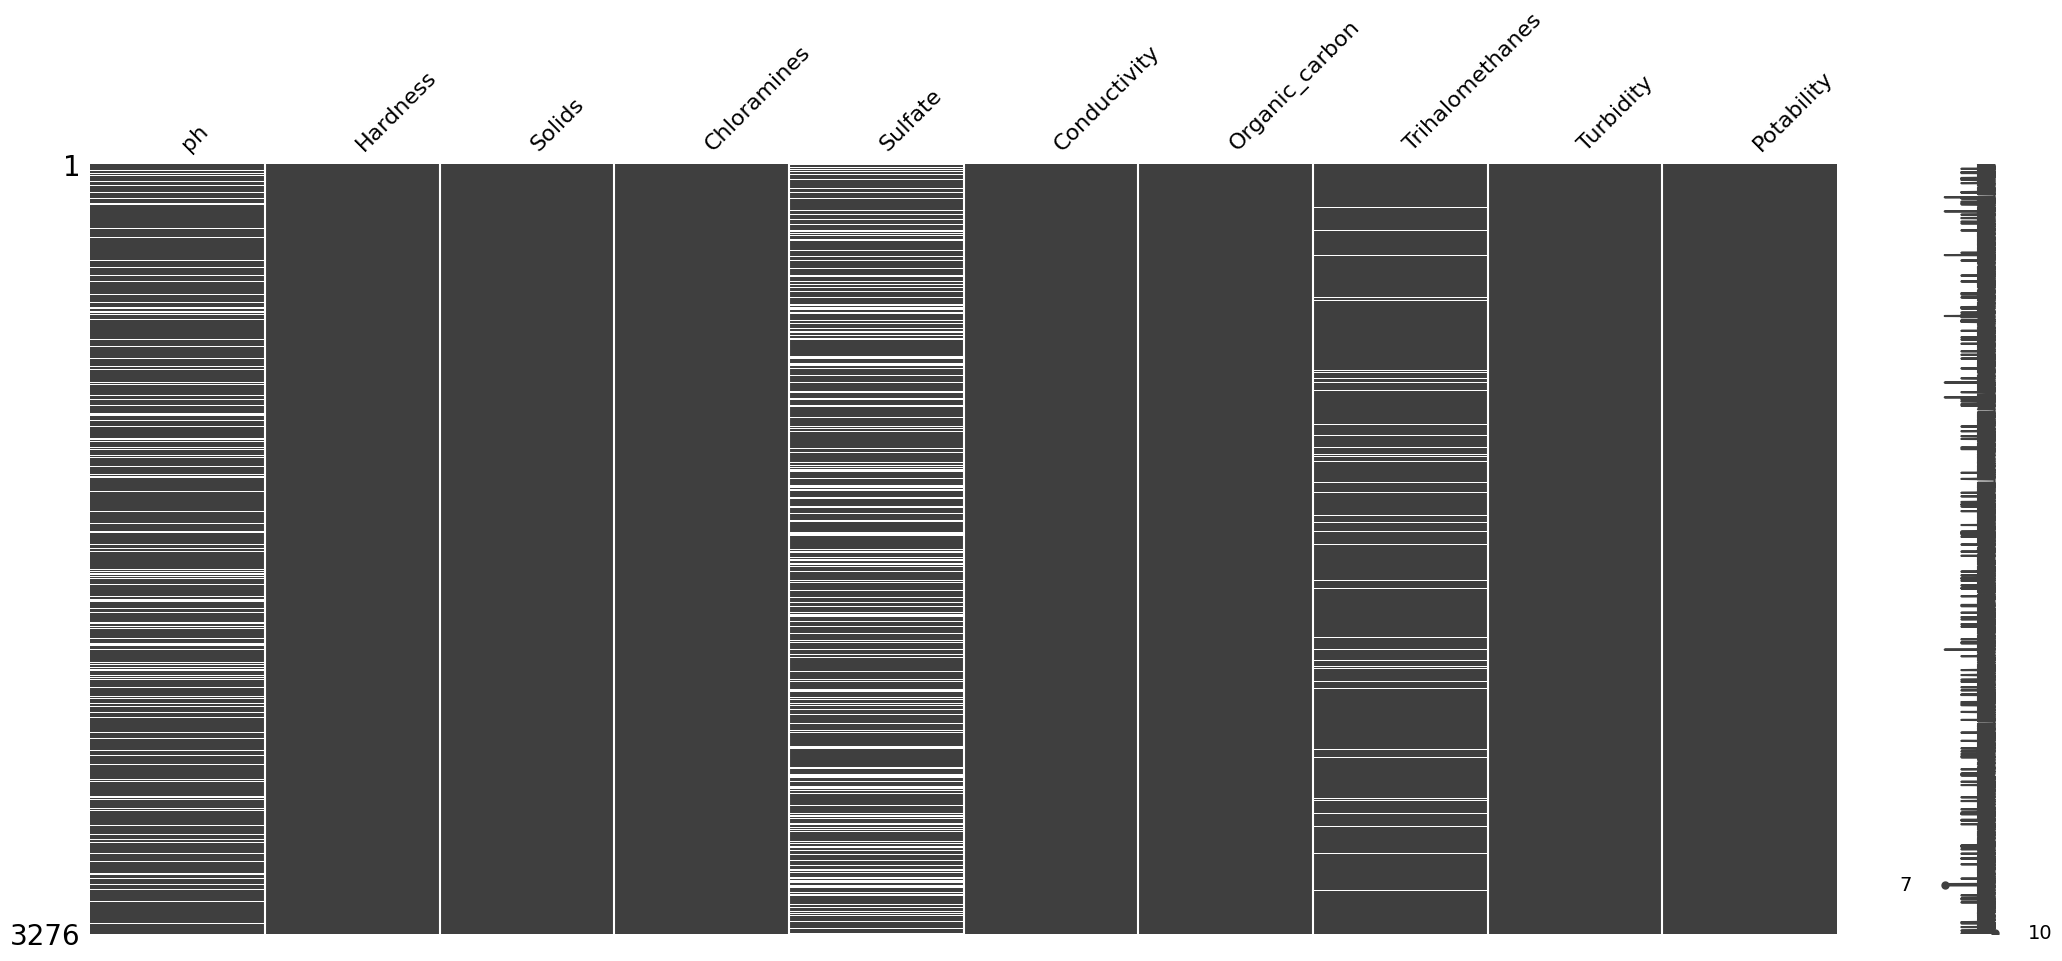

In [ ]:
msno.matrix(df)

<Axes: >

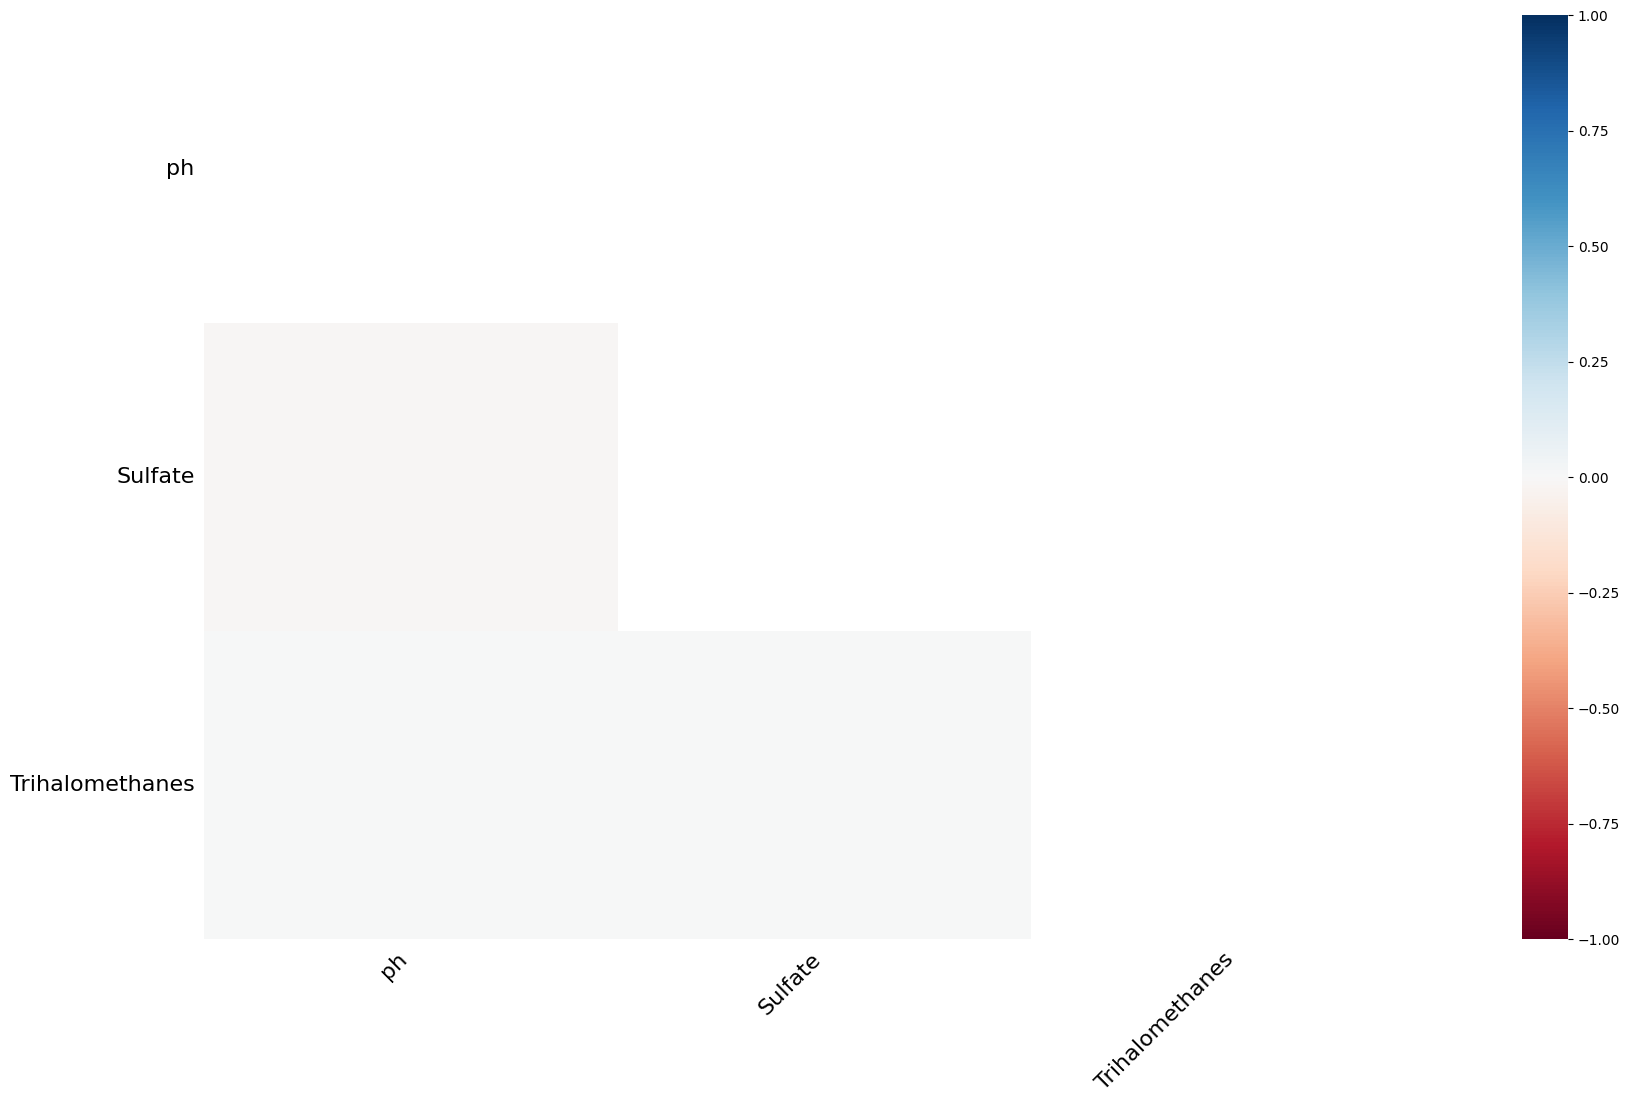

In [ ]:
msno.heatmap(df)

## Handling the Missing Values

In [13]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [14]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [15]:
from sklearn.impute import SimpleImputer

Using mean to fill the missing values for 'ph' and 'Sulfate' because data is normally distributed.

In [16]:
imputer=SimpleImputer(strategy='constant',fill_value=df['ph'].mean())
df['ph']=imputer.fit_transform([df['ph']])[0]

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [17]:
imputer=SimpleImputer(strategy='constant',fill_value=df['Sulfate'].mean())
df['Sulfate']=imputer.fit_transform([df['Sulfate']])[0]

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


'Trihalomethanes' is not corellated with other columns, and the accuracy is better when it is filled with 0

In [18]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
df['Trihalomethanes']=imputer.fit_transform([df['Trihalomethanes']])[0]

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [19]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X,Y=df.drop(columns=['Potability']),df['Potability']

In [22]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [25]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearset Neighbors Classification

Instance of the KNN Classification model and training it using the fit function:

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [27]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

Using the trained model to make predictions for the test set:

In [28]:
y_pred=knn.predict(X_test)

Assessing the performance of the model by using different classification metrics provided by the `scikit-learn` library:

In [29]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score

## Classification report

In [33]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       385
           1       0.58      0.38      0.46       271

    accuracy                           0.63       656
   macro avg       0.61      0.59      0.59       656
weighted avg       0.62      0.63      0.61       656



Class 0 performs better:

Higher recall (77%) and precision (66%).
Indicates the model is biased toward predicting Class 0.
Class 1 struggles:

Low recall (38%) and F1-score (44%).
Indicates the model misses many positives, possibly due to class imbalance.
Imbalanced Class Performance:

The weighted average metrics are closer to Class 0's metrics, as it has more samples (401 vs. 255).
Macro averages are lower, showing the model underperforms for the minority class.


## Confusion matrix

In [34]:
print(confusion_matrix(Y_test,y_pred))

[[309  76]
 [167 104]]


Assuming the rows represent actual classes and the columns represent predicted classes:

#### True Negative (TN = 316):
The model correctly predicted negative class (e.g., predicted 0 and the actual label is 0).

#### False Positive (FP = 97):
The model incorrectly predicted positive class (e.g., predicted 1, but the actual label is 0).
Also called a "Type I Error."

#### False Negative (FN = 144):
The model incorrectly predicted negative class (e.g., predicted 0, but the actual label is 1).
Also called a "Type II Error."

#### True Positive (TP = 103):
The model correctly predicted positive class (e.g., predicted 1 and the actual label is 1).

In [35]:
print(f1_score(Y_test,y_pred))


0.4611973392461197


# Fine-tuning the K-Nearset Neighbors Hyperparameter

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

In [38]:
optimal_k = 0
highest_accuracy = 0
accuracy_scores = []
neighbor_values = []

for neighbors in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(X_train, Y_train)
    predictions = knn_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, predictions)
    neighbor_values.append(neighbors)
    accuracy_scores.append(accuracy)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        optimal_k = neighbors


## Final Assessment of the Model Performance
Evaluation of model's performance on a test set for final assessment.

Text(0.5, 1.0, 'K-Nearest Neighbors (KNN) Accuracy vs. Number of Neighbors')

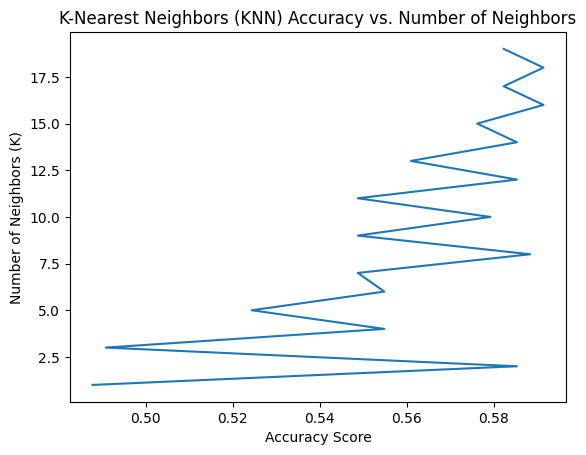

In [39]:
plt.plot(accuracy_scores, neighbor_values)
plt.xlabel("Accuracy Score")
plt.ylabel("Number of Neighbors (K)")
plt.title("K-Nearest Neighbors (KNN) Accuracy vs. Number of Neighbors")

In [40]:
knn=KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)

In [41]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73       201
           1       0.39      0.10      0.16       127

    accuracy                           0.59       328
   macro avg       0.50      0.50      0.45       328
weighted avg       0.53      0.59      0.51       328



In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
print(confusion_matrix(Y_test,y_pred))

[[181  20]
 [114  13]]


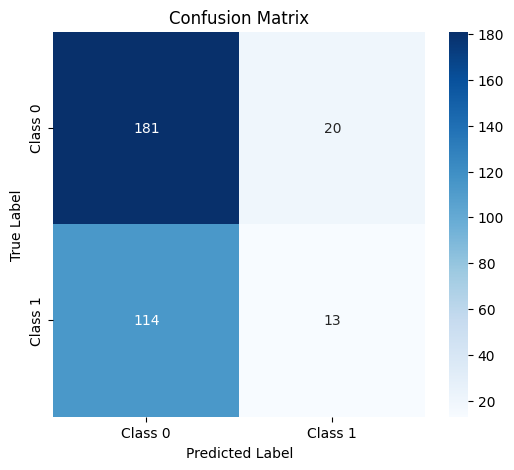

In [44]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(Y_test,y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.5914634146341463


##Multicolinearity

In [77]:
from matplotlib.colors import ListedColormap

In [78]:
custom_colors = ListedColormap(['#9ED7E6', '#afdae0', '#8DBBCC', '#a9c7ee', '#93b9e1',
                 '#7AA2C4', '#587880', '#727E8B', '#4A6378'])

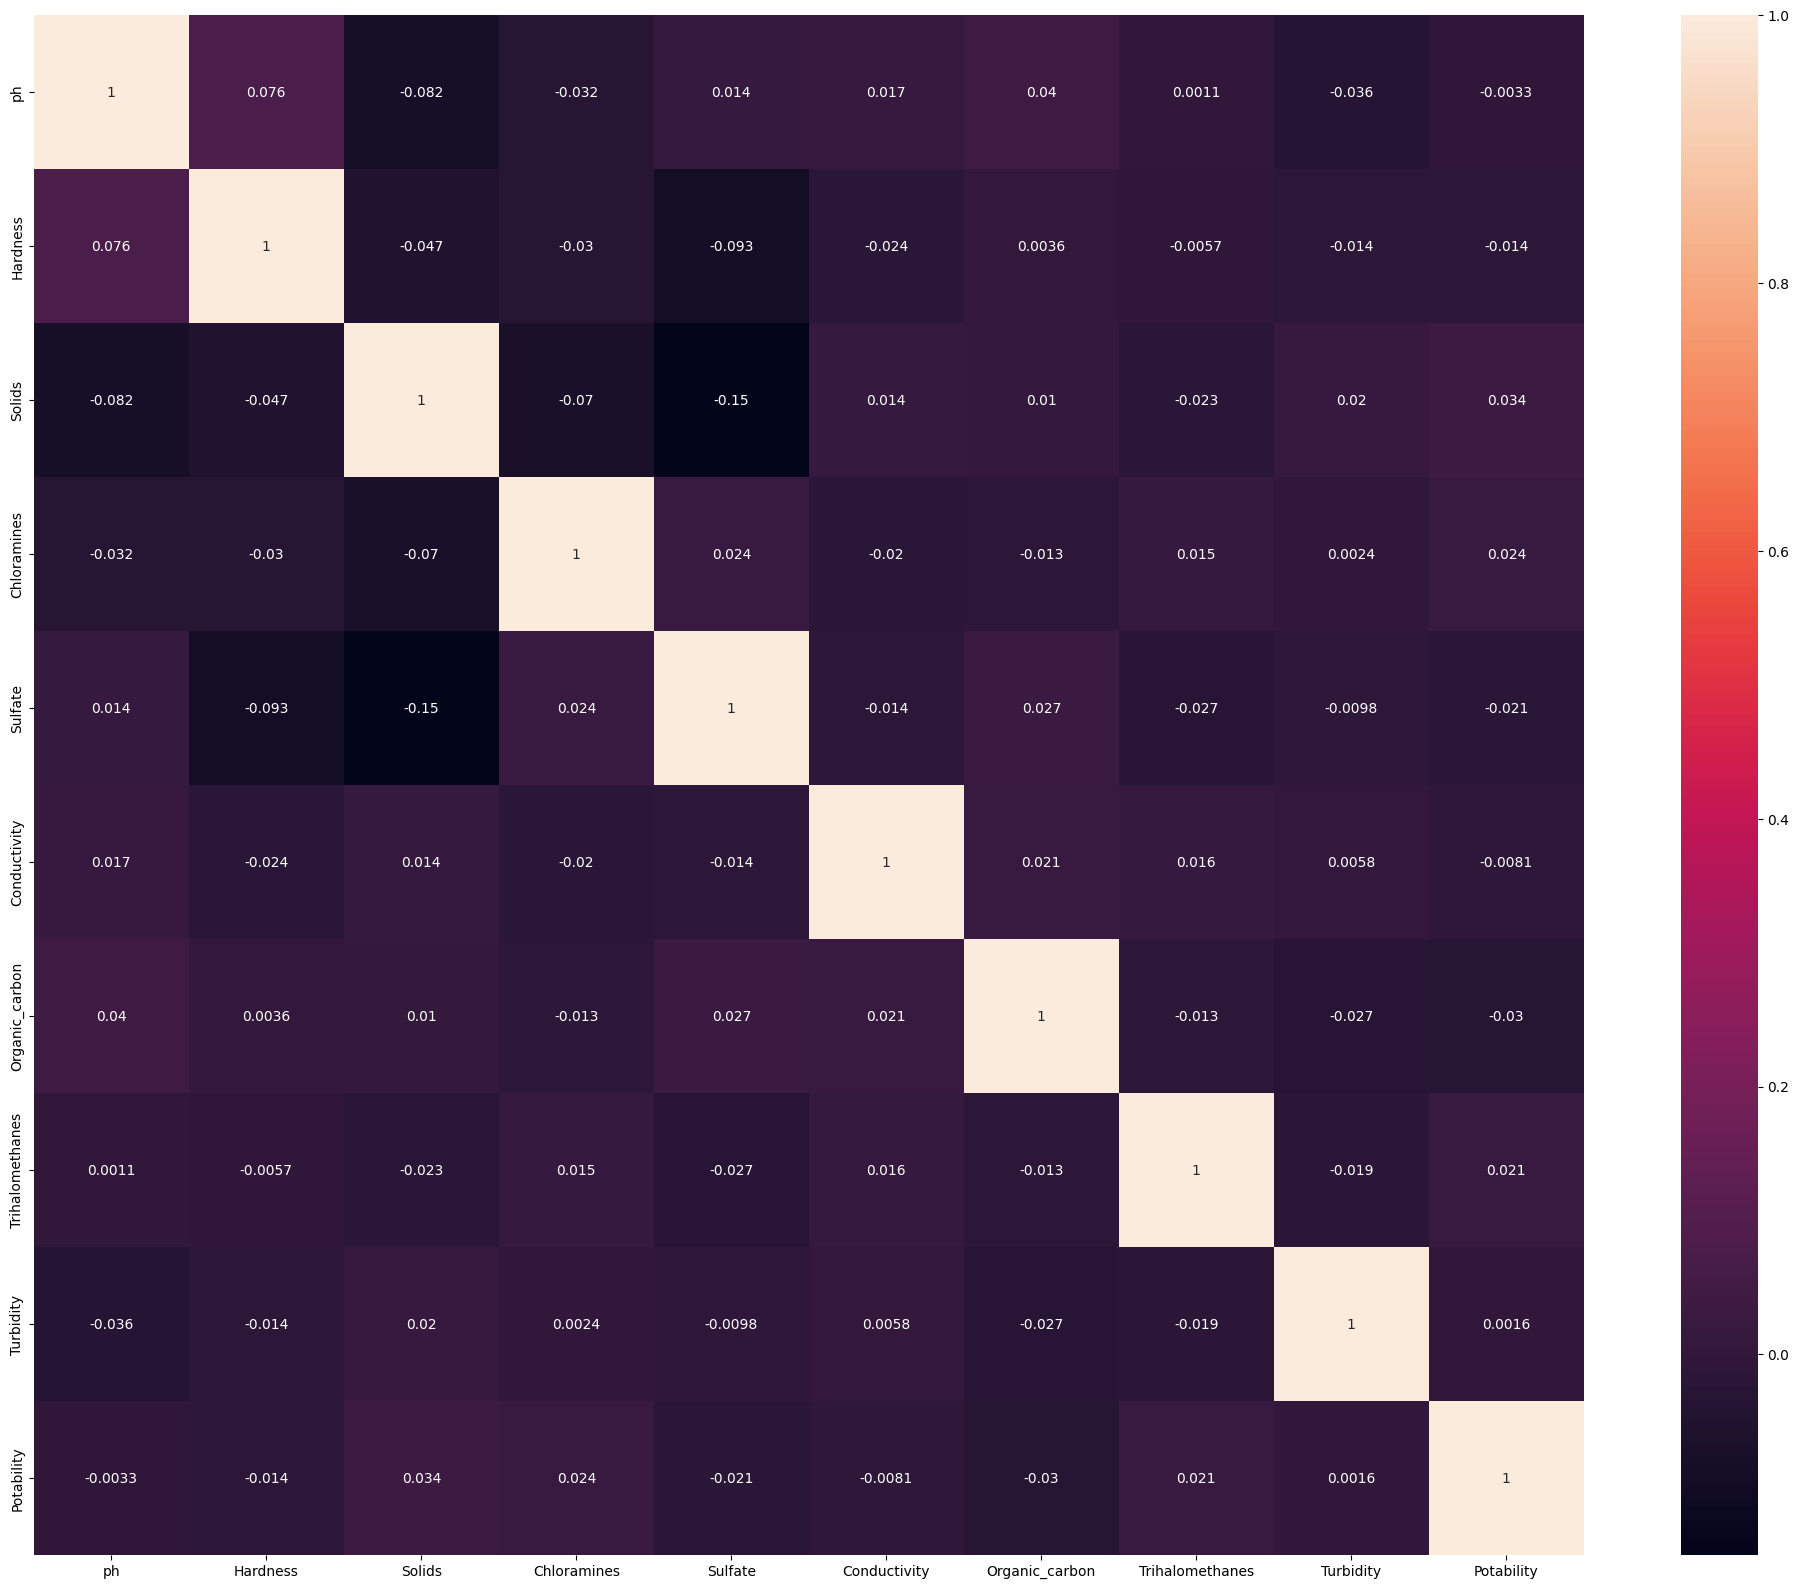

In [50]:
plt.figure(figsize = (25, 20))
sns.heatmap(df.corr(), annot = True, cmap=custom_colors)
plt.show()

There is no multicolinearity between independent values.

#Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold,cross_val_predict

In [59]:
cv = KFold(5)

In [60]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": range(2, 6),
    "min_samples_split": range(20, 50, 5),
}

In [61]:
results = []
for criterion in params['criterion']:
  for max_depth in params['max_depth']:
    for min_samples in params['min_samples_split']:
      clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples)
      predictions = cross_val_predict(clf, X, Y, cv=cv)
      node = {
          "model": clf,
          "score": f1_score(Y, predictions, average='weighted')
      }
      results.append(node)

In [62]:
results.sort(key=lambda x: x['score'], reverse=True)

In [63]:
best_model = results[0]['model']

In [64]:
predictions = cross_val_predict(best_model, X, Y, cv=cv)

In [65]:
f1_score(Y, predictions, average='weighted')

0.5596036660761496

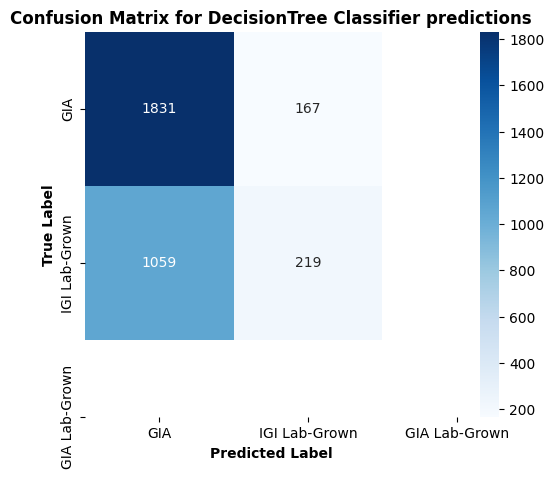

In [66]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(Y, predictions), annot=True, fmt="d", cmap="Blues", xticklabels=["GIA", "IGI Lab-Grown","GIA Lab-Grown"], yticklabels=["GIA", "IGI Lab-Grown","GIA Lab-Grown"])

plt.title("Confusion Matrix for DecisionTree Classifier predictions", fontweight='bold')
plt.xlabel("Predicted Label", fontweight='bold')
plt.ylabel("True Label", fontweight='bold')
plt.show()

In [67]:
print(classification_report(Y, predictions))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75      1998
           1       0.57      0.17      0.26      1278

    accuracy                           0.63      3276
   macro avg       0.60      0.54      0.51      3276
weighted avg       0.61      0.63      0.56      3276

